In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz 
from sklearn.tree import DecisionTreeRegressor

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

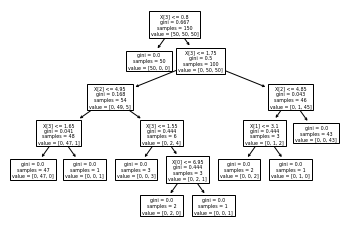

In [5]:
# Classification tree sample
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf)

In [8]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

In [9]:
graphviz.Source(tree.export_graphviz(clf, out_file=None)).render("iris")

'iris.pdf'

In [26]:
# Continuous: odometer_value, engine_capacity, transmission, odometer_value, duration_listed
# Categorical: manufacturer_name, model_name, transmission, color, engine_fuel, engine_has_gas, engine_type, body_type, has_warranty, state, drivetrain, is_exchangeable, location_region, feature_0 to 9
# Confusing: year_produced, number_of_photos, up_counter
# Target: price_usd

cars = pd.read_csv('../mydata/cars.csv')
cars.engine_capacity.fillna(cars.engine_capacity.mean(), inplace=True)
#X = cars.drop(['price_usd','model_name'], axis=1).values
#y = cars['price_usd'].values

X = cars[['odometer_value', 'engine_capacity', 'duration_listed']].values
y = cars['price_usd'].values

In [27]:
regr_1 = DecisionTreeRegressor(max_depth=30)
regr_2 = DecisionTreeRegressor(max_depth=50)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
pred_30 = regr_1.predict(X)
pred_50= regr_2.predict(X)

In [34]:
results = pd.DataFrame({'Actual':y, 'Predicted_30': pred_30, 'Predicted_50': pred_50})
results.head(25)

,Actual,Predicted_30,Predicted_50
0,10900.00,10900.000,10900.00
1,5000.00,7450.000,7450.00
2,2800.00,4238.110,2800.00
3,9999.00,9999.000,9999.00
4,2134.11,3442.055,2134.11
5,14700.00,14700.000,14700.00
6,3000.00,3000.000,3000.00
7,4500.00,4850.000,4500.00
8,12900.00,12900.000,12900.00
9,4200.00,4200.000,4200.00


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, pred_30))  
print('Mean Squared Error:', metrics.mean_squared_error(y, pred_30))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pred_30)))

print('Mean Absolute Error:', metrics.mean_absolute_error(y, pred_50))  
print('Mean Squared Error:', metrics.mean_squared_error(y, pred_50))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pred_50)))

Mean Absolute Error: 280.2611779938954
Mean Squared Error: 945204.8589017066
Root Mean Squared Error: 972.2164671006692
Mean Absolute Error: 223.83996895664572
Mean Squared Error: 776305.8646805938
Root Mean Squared Error: 881.0822122143846
